/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-15-482b8201afb5>:51: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['uom_criteria'].fillna(method='ffill', inplace=True)
<ipython-input-15-482b8201afb5>:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['conversion'].fillna(method='ffill', inplace=True)


Number of unique transactions: 994
Number of unique items: 971


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Best number of clusters: 9


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Test Loss: 0.1040
Test Accuracy: 0.9864
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


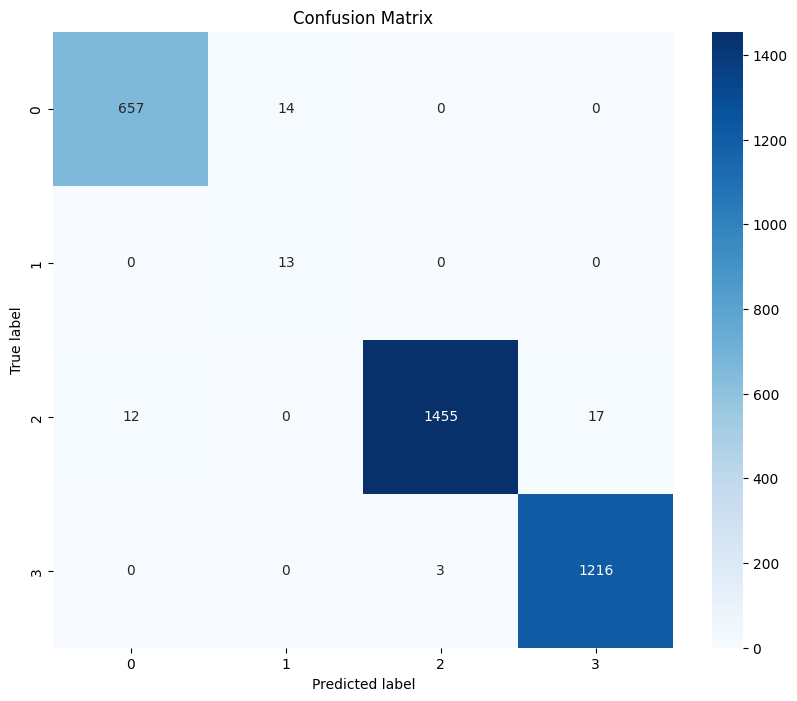

              precision    recall  f1-score   support

      NOVA 0       0.98      0.98      0.98       671
      NOVA 1       0.48      1.00      0.65        13
      NOVA 2       1.00      0.98      0.99      1484
      NOVA 3       0.99      1.00      0.99      1219

    accuracy                           0.99      3387
   macro avg       0.86      0.99      0.90      3387
weighted avg       0.99      0.99      0.99      3387

Considering item: MILO 5*10G SATCHETS, Price: 50.00, Current total: 0.00
Added MILO 5*10G SATCHETS, New total: 50.00
Considering item: C.I.L PISHORI RICE 2KG, Price: 445.00, Current total: 50.00
Added C.I.L PISHORI RICE 2KG, New total: 495.00
Considering item: PEPTANG RED PLUM JAM 250G, Price: 85.00, Current total: 495.00
Considering item: SAFARI BEEF SAUSAGE 500G F/CHOICE, Price: 295.00, Current total: 495.00
Considering item: H.O.MANJI FAMILY 200G, Price: 90.00, Current total: 495.00
Considering item: FESTIVE PREM BURGER PLAIN, Price: 78.00, Current total: 

In [15]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from transformers import BertTokenizer, TFBertModel
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from transformers import BertTokenizer, TFBertModel
from scipy.stats import uniform
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
from transformers import AdamW
from scipy.stats import randint, uniform

# Load the data
df = pd.read_csv("/content/drive/My Drive/food_classes_edited_twice.csv", na_values=["<NA>", "nan", "Nill", "Nil"])
df = df.head(3500)

# Data Preprocessing
def preprocess_data(df):
    # Handle missing values
    df['uom_criteria'].fillna(method='ffill', inplace=True)
    df['conversion'].fillna(method='ffill', inplace=True)
    df['price_new'].fillna(df['price_new'].mean(), inplace=True)
    df['price_uom'].fillna(df['price_uom'].mean(), inplace=True)

    # Drop unnecessary columns
    df.drop(['dob_new', 'age_group', 'Unnamed: 0'], axis=1, inplace=True)

    # Encode categorical variables
    le = LabelEncoder()
    categorical_cols = ['item_type', 'class_name', 'subclass_name', 'nova', 'customer_type', 'standard_uom', 'class_name_uom']
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    df['original_price'] = df['price_new']

    # Normalize numerical features
    scaler = StandardScaler()
    numerical_cols = ['price_new', 'conversion', 'price_uom']
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df

# Feature Engineering
def engineer_features(df):
    df['price_per_unit'] = df['price_new'] / df['conversion']
    return df

# Define health items
def define_health_items(df):
    df['health_score'] = df['nova'].map({0: 3, 1: 2, 2: 1, 3: 0})
    return df

# Main process
df = preprocess_data(df)
df = engineer_features(df)
df = define_health_items(df)

print(f"Number of unique transactions: {df['transaction_id'].nunique()}")
print(f"Number of unique items: {df['description'].nunique()}")

# Prepare data for market basket analysis
transactions = df.groupby('transaction_id')['description'].apply(list).values.tolist()

# Perform one-hot encoding on the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort rules by lift
rules = rules.sort_values('lift', ascending=False)

# BERT Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize descriptions
inputs = tokenizer(list(df['description']), return_tensors="tf", padding=True, truncation=True, max_length=512)

# Get BERT embeddings
outputs = bert_model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
bert_embeddings = outputs.last_hidden_state[:, 0, :]  # Take the output embeddings from the first token ([CLS])

# Add custom output layer to BERT
custom_output = Dense(64, activation='relu')(bert_embeddings)
custom_output = Dense(32, activation='relu')(custom_output)
custom_output = Dense(16, activation='relu')(custom_output)

# Combine BERT embeddings with other features
other_features = df[['price_new', 'price_per_unit', 'health_score']].values
combined_features = tf.concat([custom_output, other_features], axis=1)

# Convert TensorFlow tensor to NumPy array for K-means
combined_features_np = combined_features.numpy()

# K-Means Clustering
param_grid = {'n_clusters': [3, 5, 7, 9]}
grid = RandomizedSearchCV(KMeans(random_state=42), param_grid, n_iter=10, cv=3, random_state=42)
grid.fit(combined_features_np)
print(f"Best number of clusters: {grid.best_params_['n_clusters']}")

# Apply best K-Means model
best_kmeans = KMeans(n_clusters=grid.best_params_['n_clusters'], random_state=42)
df['cluster_label'] = best_kmeans.fit_predict(combined_features_np)

# Build the recommendation model
n_items = len(df['description'].unique())
embedding_size = 50
n_classes = 4  # For NOVA classification (0, 1, 2, 3)

input_target = Input((1,), name='input_target')
input_context = Input((1,), name='input_context')
input_features = Input((combined_features.shape[1],), name='input_features')

embedding = Embedding(n_items, embedding_size, input_length=1, name='embedding')
target_embedding = embedding(input_target)
context_embedding = embedding(input_context)

target = Flatten()(target_embedding)
context = Flatten()(context_embedding)

dot_product = tf.keras.layers.Dot(axes=1)([target, context])
concat = Concatenate()([dot_product, input_features])
hidden = Dense(64, activation='relu')(concat)
output = Dense(n_classes, activation='softmax')(hidden)

model = Model(inputs=[input_target, input_context, input_features], outputs=output)

# Custom hyperparameter tuning function
def custom_hyperparameter_tuning(X_train, y_train, param_dist, n_iter=10):
    best_model = None
    best_loss = float('inf')

    for _ in range(n_iter):
        learning_rate = np.random.uniform(param_dist['learning_rate'][0], param_dist['learning_rate'][1])

        model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

        history = model.fit(
            [X_train[:, 0], X_train[:, 1], f_train],
            y_train,
            epochs=10,
            batch_size=32,
            validation_split=0.2,
            verbose=0
        )

        val_loss = min(history.history['val_loss'])

        if val_loss < best_loss:
            best_loss = val_loss
            best_model = model

    return best_model

# Prepare data for the model
item_to_index = {item: idx for idx, item in enumerate(df['description'].unique())}
index_to_item = {idx: item for item, idx in item_to_index.items()}

def create_item_pairs(transactions):
    pairs = []
    features = []
    labels = []
    for transaction in transactions:
        for i in range(len(transaction)):
            for j in range(i+1, len(transaction)):
                pairs.append((item_to_index[transaction[i]], item_to_index[transaction[j]]))
                pairs.append((item_to_index[transaction[j]], item_to_index[transaction[i]]))
                features.extend([combined_features_np[df['description'] == transaction[i]][0]] * 2)
                labels.extend([df[df['description'] == transaction[i]]['nova'].values[0]] * 2)
    return np.array(pairs), np.array(features), np.array(labels)

item_pairs, item_features, item_labels = create_item_pairs(transactions)

# Convert labels to one-hot encoding
item_labels_onehot = tf.keras.utils.to_categorical(item_labels, num_classes=n_classes)

# Split data
X_train, X_test, f_train, f_test, y_train, y_test = train_test_split(item_pairs, item_features, item_labels_onehot, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_dist = {'learning_rate': (0.0001, 0.01)}
best_model = custom_hyperparameter_tuning(X_train, y_train, param_dist, n_iter=10)

# Evaluate the model
test_loss, test_accuracy = best_model.evaluate([X_test[:, 0], X_test[:, 1], f_test], y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred = best_model.predict([X_test[:, 0], X_test[:, 1], f_test])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
labels = [0, 1, 2, 3]
print(classification_report(y_true_classes, y_pred_classes, labels=labels, target_names=['NOVA 0', 'NOVA 1', 'NOVA 2', 'NOVA 3']))
# Extract item embeddings
item_embeddings = best_model.get_layer('embedding').get_weights()[0]

# Function to get recommendations
def get_recommendations(item_id, budget, top_n=5):
    # Get rules for the given item
    item_rules = rules[rules['antecedents'].apply(lambda x: item_id in x)]

    # Get embedding-based similarities
    item_idx = item_to_index[item_id]
    item_embedding = item_embeddings[item_idx]
    similarities = np.dot(item_embeddings, item_embedding) / (np.linalg.norm(item_embeddings, axis=1) * np.linalg.norm(item_embedding))

    # Combine rule-based and embedding-based recommendations
    recommendations = []
    total_cost = 0
    considered_items = set()

    # First, consider items from association rules
    for _, rule in item_rules.iterrows():
        for item in rule['consequents']:
            if item not in considered_items and item != item_id:
                considered_items.add(item)
                item_price = df[df['description'] == item]['original_price'].iloc[0]
                print(f"Considering item: {item}, Price: {item_price:.2f}, Current total: {total_cost:.2f}")
                if total_cost + item_price <= budget:
                    cluster_label = df[df['description'] == item]['cluster_label'].iloc[0]
                    recommendations.append((item, similarities[item_to_index[item]], cluster_label))
                    total_cost += item_price
                    print(f"Added {item}, New total: {total_cost:.2f}")
                    if len(recommendations) == top_n:
                        return [r[0] for r in sorted(recommendations, key=lambda x: (x[1], x[2]), reverse=True)], total_cost

    # If we haven't found enough recommendations, use embedding similarities
    for item_idx in similarities.argsort()[::-1]:
        item = index_to_item[item_idx]
        if item not in considered_items and item != item_id:
            considered_items.add(item)
            item_price = df[df['description'] == item]['original_price'].iloc[0]
            print(f"Considering item: {item}, Price: {item_price:.2f}, Current total: {total_cost:.2f}")
            if total_cost + item_price <= budget:
                cluster_label = df[df['description'] == item]['cluster_label'].iloc[0]
                recommendations.append((item, similarities[item_idx], cluster_label))
                total_cost += item_price
                print(f"Added {item}, New total: {total_cost:.2f}")
                if len(recommendations) == top_n:
                    break

    return [r[0] for r in sorted(recommendations, key=lambda x: (x[1], x[2]), reverse=True)], total_cost

# Example usage
item_id = df['description'].iloc[0]  # Example item ID
budget = 500  # Example budget
recommendations, total_cost = get_recommendations(item_id, budget)
print(f"\nItem: {item_id}")
print(f"Recommended items: {recommendations}")
print(f"Total cost: ${total_cost:.2f}")

In [17]:
# Save the model in Keras format
best_model.save('/content/drive/My Drive/my_recommendation_model.keras')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
item_id = df['description'].iloc[1]  # Example item ID
budget = 500  # Example budget
recommendations, total_cost = get_recommendations(item_id, budget)
print(f"\nItem: {item_id}")
print(f"Recommended items: {recommendations}")
print(f"Total cost: ${total_cost:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Considering item: AVENA VEG OIL 2LTR, Price: 359.00, Current total: 0.00
Added AVENA VEG OIL 2LTR, New total: 359.00
Considering item: UFUTA COOKING OIL 10L, Price: 1354.00, Current total: 359.00
Considering item: PILAU MASALA 50G PKT CHARSCO, Price: 60.00, Current total: 359.00
Added PILAU MASALA 50G PKT CHARSCO, New total: 419.00
Considering item: MELVINS GINGER TEA 250G, Price: 141.00, Current total: 419.00
Considering item: BUTTERFLY STD SPAGHETTI 2*500G V/PACK, Price: 110.00, Current total: 419.00
Considering item: SWEET HEART CAKE 150G J/SUPER, Price: 45.00, Current total: 419.00
Added SWEET HEART CAKE 150G J/SUPER, New total: 464.00
Considering item: NICE BIRYANI RICE 2KG, Price: 275.00, Current total: 464.00
Considering item: KOL TOMATO SAUCE 2L JERICAN, Price: 159.00, Current total: 464.00
Considering item: BAHARI FRY 2L, Price: 333.00, Current total: 464.00
Considering item: KASUKU 2KG, Price: 365.00, Current total: 464.00
Considering item: PEMBE MAIZE 2KG, Price: 98.00, Curr